## Predicting Sales Prices: Ames Property Dataset

Bronwyn Bowles-King

### 1. Dataset attributes

The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2 930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

Some of the variables contained in the original dataset have been removed from the the dataset for this analysis. The variables included are listed below. The term 'above-grade' means 'above-ground'.

* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above-grade, ground living area in square feet
* **Full_Bath:** number of full above-grade bathrooms in the house
* **Half_Bath:** number of half above-grade bathrooms in the house
* **Bedroom_AbvGr:** number of above-grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above-grade kitchens
* **TotRms_AbvGrd:** total number of above-grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in US dollars (USD)

### 2. Objective

The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the ground living area (Gr_Liv_Area) and garage area (Garage_Area) variables.


### 3. Preparation steps 

#### 3.1 Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("ames.csv")
df.shape

(2930, 14)

#### 3.2 Preview the data

In [3]:
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


#### 3.3 Clean and preprocess the data

In [4]:
print("Missing values:")
print(df.isnull().sum())  

Missing values:
Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


In [5]:
# Find and remove duplicates

print(f'Duplicate rows: {df.duplicated().sum()}')
df.drop_duplicates(keep='first')

Duplicate rows: 7


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1984,1984,1003,1003,0,1003,1,0,3,1,6,0,588,142500
2926,1983,1983,864,902,0,902,1,0,2,1,5,0,484,131000
2927,1992,1992,912,970,0,970,1,0,3,1,6,0,0,132000
2928,1974,1975,1389,1389,0,1389,1,0,2,1,6,1,418,170000


In [6]:
# Inspect data types for suitability for numerical data manipulation

print(df.dtypes)

Year_Built        int64
Year_Remod_Add    int64
Total_Bsmt_SF     int64
First_Flr_SF      int64
Second_Flr_SF     int64
Gr_Liv_Area       int64
Full_Bath         int64
Half_Bath         int64
Bedroom_AbvGr     int64
Kitchen_AbvGr     int64
TotRms_AbvGrd     int64
Fireplaces        int64
Garage_Area       int64
Sale_Price        int64
dtype: object


#### 4. View statistical descriptive summary

In [7]:
print('Descriptive summary')
print(df.describe())

Descriptive summary
        Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  \
count  2930.000000     2930.000000    2930.000000   2930.000000   
mean   1971.356314     1984.266553    1051.255631   1159.557679   
std      30.245361       20.860286     440.968018    391.890885   
min    1872.000000     1950.000000       0.000000    334.000000   
25%    1954.000000     1965.000000     793.000000    876.250000   
50%    1973.000000     1993.000000     990.000000   1084.000000   
75%    2001.000000     2004.000000    1301.500000   1384.000000   
max    2010.000000     2010.000000    6110.000000   5095.000000   

       Second_Flr_SF  Gr_Liv_Area    Full_Bath    Half_Bath  Bedroom_AbvGr  \
count    2930.000000  2930.000000  2930.000000  2930.000000    2930.000000   
mean      335.455973  1499.690444     1.566553     0.379522       2.854266   
std       428.395715   505.508887     0.552941     0.502629       0.827731   
min         0.000000   334.000000     0.000000     0.000000     

### 5. Univariate analysis 

#### 5.1 Independent variables

The distribution of the data on the year in which the house was built (Year_Built) (Figure 1) is right-skewed towards higher values, meaning that most of the houses were built more recently, especially after around 1990, although a considerable number were also built between 1950 and 1980. Relatively few were built between 1980 and 1990 or before 1950. 

For the year that the house was last remodelled (Year_Remod_Add) (Figure 2), the distribution is bimodal on the extreme left and right side, so that most houses were renovated between around 1950 and 1955 or between 2000 and 2010.

The features below follow a fairly normal distribution or bell curve:

* Size of basement area (Total_Bsmt_SF) (Figure 3).
* Size of the first floor (First_Flr_SF) (Figure 4).
* Size of above-ground living area, i.e. the ground floor (Gr_Liv_Area) (Figure 6). 
* Number of bedrooms from the ground floor upwards (Bedroom_AbvGr) (Figure 9).
* Number of rooms from the ground floor upwards (TotRms_AbvGrd) (Figure 11).

As the size of the basement, ground and first floors increase, the number of houses of that relative size increases until it reaches a maximum of around 1 000 ft², depending on the specific feature. Thereafter, the number of houses decreases as the square footage increases. This is also true for the number of bedrooms and the overall number of rooms in the house besides the basement, if there is one. The graph shows that most houses have six rooms, while those with fewer than four or more than 10 are quite rare. These findings are to be expected because few houses are very large or very small.

The size of the second-floor area is left-skewed (Second_Flr_SF) (Figure 5) so that most homes are at the zero point, having no second floor, while a few have a second floor between about 500 and 1 400 ft².

Three of the graphs have a structure that is somewhat close to, but not fully binary. For the number of kitchens (Kitchen_AbvGr) (Figure 10), almost all homes have one kitchen and a small number have two. An even smaller minority have no kitchen. The majority of houses have either one or two full bathrooms (Full_Bath), and either one or no half bathrooms (Half_Bath) (Figure 7 and 8). A small minority have three full bathooms, no full bathroom, or two half bathrooms.

The three-bar histogram for number of fireplaces (Fireplaces) (Figure 12) clearly shows that almost as many homes have a fireplace as those that have none, and a surprising number have two (about 250 homes). This is likely because Iowa has cold, snowy winters.

The size of the garage area (Garage_Area) (Figure 13) shows three peaks as the majority of homes have no garage or a garage of about 300 ft² or of about 500 ft². The value of about 300 ft² aligns with the size of the average single garage and the larger value of 500 ft² aligns with the size of the average double garage. However, there is considerable variation around these sizes, with some three- or four-car garages up 1 480 ft² and some as small as 200 ft² (Bernau, 2025).

The 13 independent variables discussed above will all likely affect the final sale price of the home to some degree, depending on the desirability of the feature at the relevant quantity (such as number of fireplaces) or size (such as garage square feet) in the case of variables related to dimensions. The age of the home and whether it has been renovated recently will also determine the sale price. 

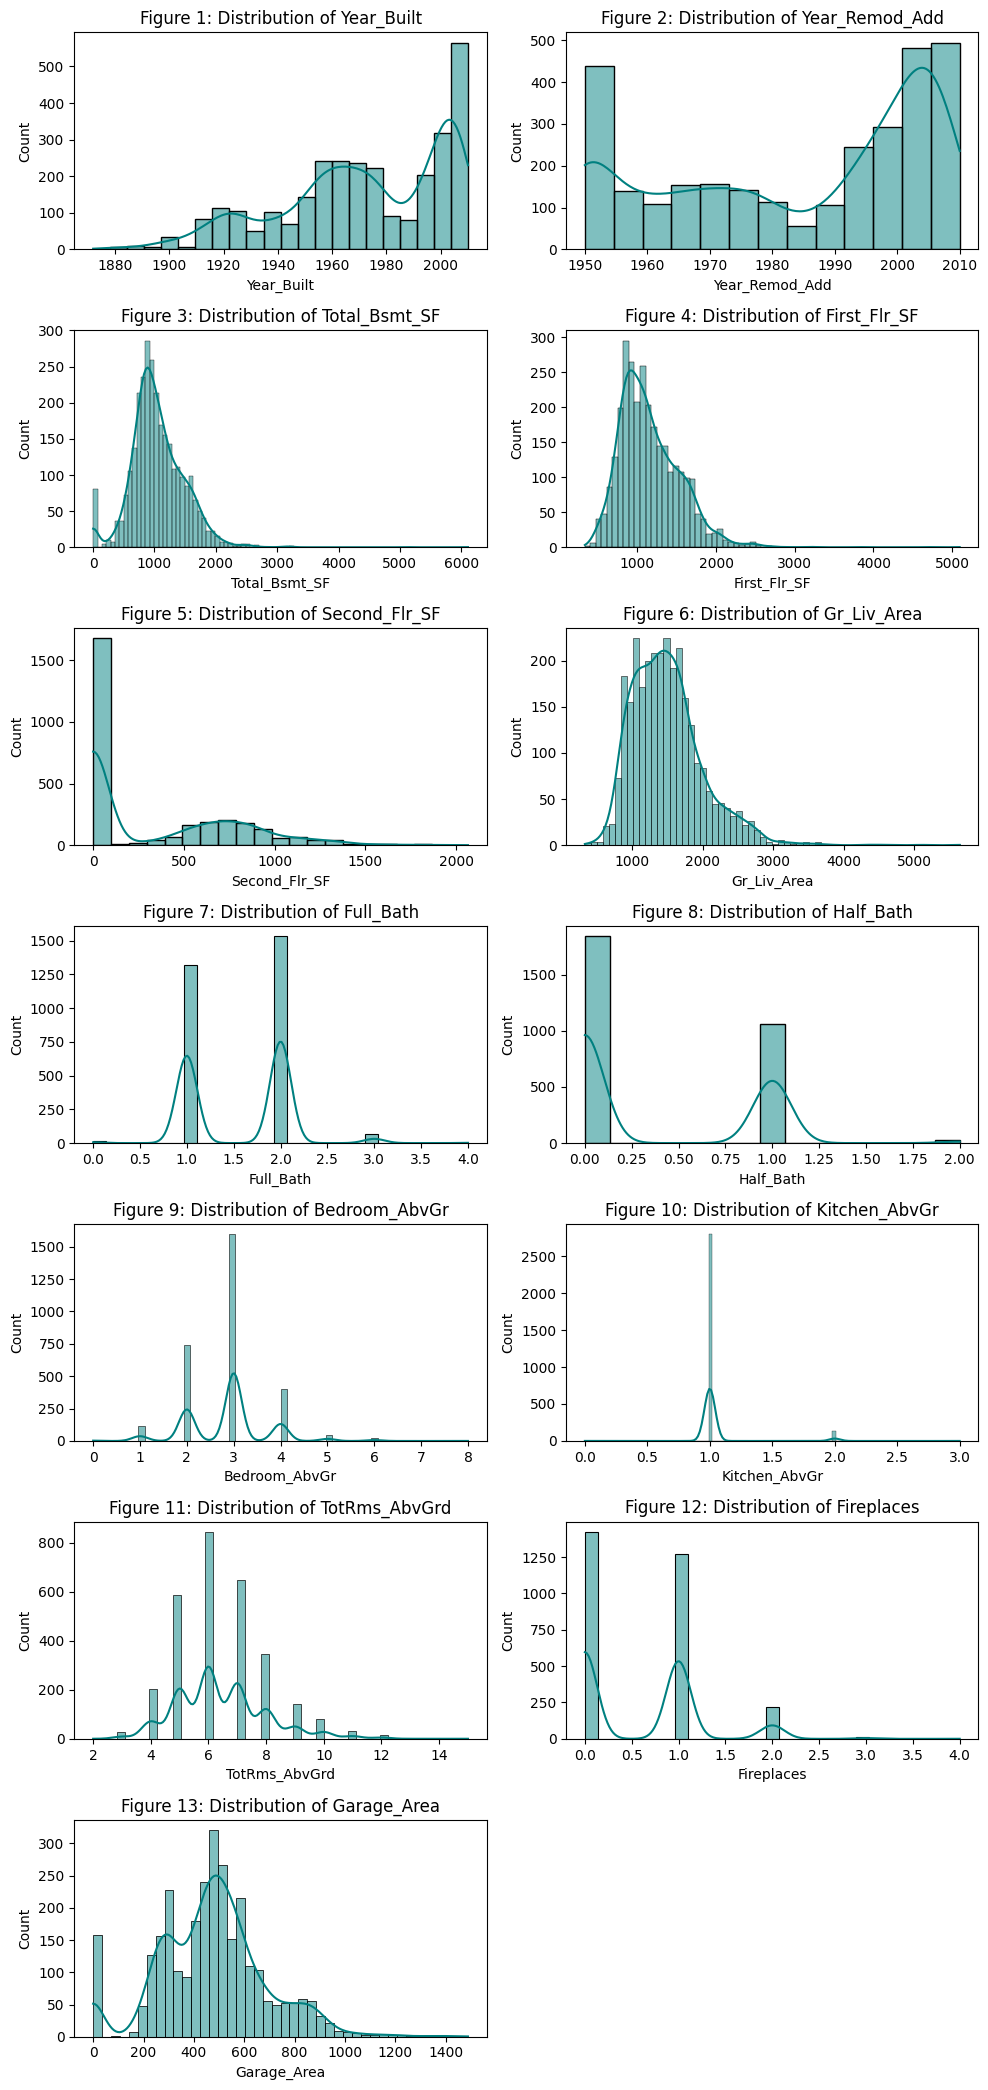

In [8]:
# Independent variable columns for plot

independent_vars_1 = [
    'Year_Built', 'Year_Remod_Add', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF',
    'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
    'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area'
]

# Create grid to plot side-by-side

n_vars = len(independent_vars_1)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)  # .ceil rounds up so there are rows for all diagrams

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3))
axes = axes.flatten()  

for i, col in enumerate(independent_vars_1, start=1):
    sns.histplot(df[col], kde=True, color='teal', ax=axes[i-1])
    axes[i-1].set_title(f'Figure {i}: Distribution of {col}')  # Start at Figure 1
    axes[i-1].set_xlabel(col)
    axes[i-1].set_ylabel('Count')

for j in range(i, len(axes)):  # Hide last unused subplot
    axes[j].remove()

plt.tight_layout()
plt.show()

#### 5.2 Dependent variable

As can be expected, the sale price follows a fairly normal distribution or bell curve, with most houses in the Ames dataset falling within a mid-price range of 100 000 to 200 000 dollars (Figure 14). 

While there are fewer homes available to buy for under 100 000 dollars, there is a range of homes from 200 000 up to 600 000 dollars, and a few over this amount up to about 750 000 dollars. The distribution thus shows a longer right tail for the higher price ranges and a shorter left tail around the lower prices.

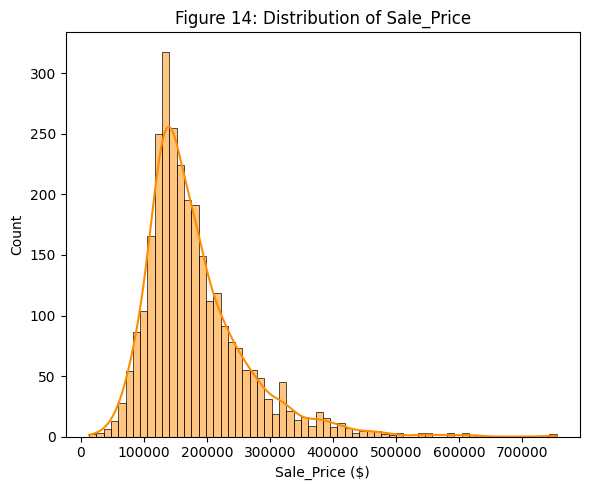

In [9]:
plt.figure(figsize=(6, 5))
sns.histplot(df['Sale_Price'], kde=True, color='darkorange')
plt.title('Figure 14: Distribution of Sale_Price')
plt.xlabel('Sale_Price ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 6. Bivariate analysis: Sales price, ground floor area and garage area 

#### 6.1 Correlation matrix 

Figure 15 below shows that price has a more positive linear relationship with the ground floor area (0.71), followed by the garage area (0.64). When this type of relationship is apparent in the data, it is not necessarily causation in all cases. However, it makes sense in context because most homes have a ground floor area, and the sizes in this category may also include the main floor area for homes in apartment blocks above the ground floor. Many homes also have garage space. The total square footage measurement for the whole house, including the garage, has a direct bearing on how the value is calculated. 

The amount of non-zero values for these features can also mean that the correlation calculations have more data to work with so that a more stable association is apparent. The opposite type of relationship is apparent here for features with many zero values, such as the number of fireplaces, which have a weaker or less reliable correlation due to sparse data.

The strong relationship between size of basement area and size of the first floor (0.8) is noteworthy, and likely because these two values can be of a similar size. The negative relationship between price and number of kitchens is noteworthy (-0.12). This suggests that multiple kitchens generally make a home less attractive, possibly because these homes are too large and require greater upkeep.

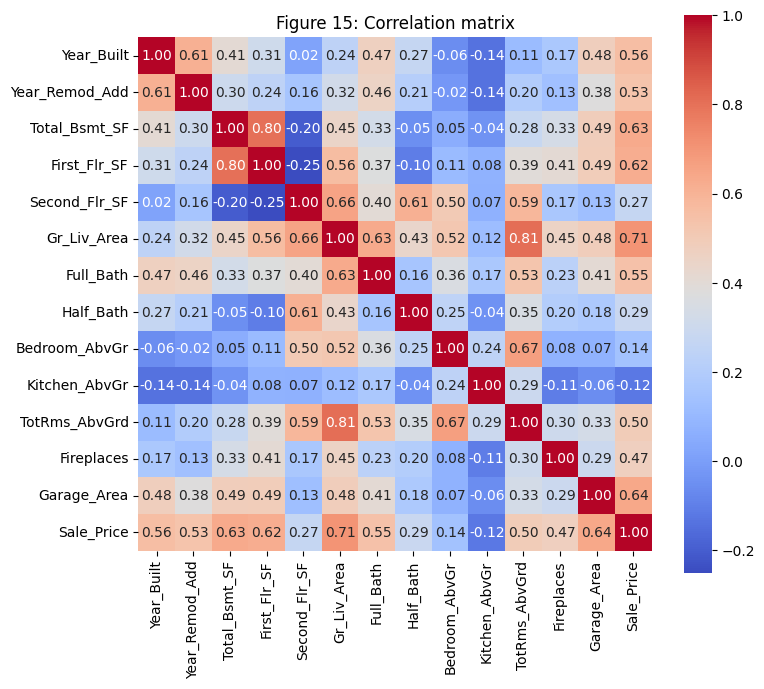

In [10]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Figure 15: Correlation matrix')
plt.tight_layout()
plt.show()

#### 6.2 Joint plots

Figure 16 below suggests a steep or rapid rise in price based on an increase in ground floor size, even by smaller increments. From Figure 17, the garage size does not influence the price as strongly as ground floor size. As the garage size increases, there is a corresponding rise in price, but this is not as sharp as with ground floor area. 

This is in line with the general view that living area size would be a more primary consideration for most buyers as opposed to garage size. Garage size can be important to some buyers, but it is not always important and would less likely be more important than the living area size.

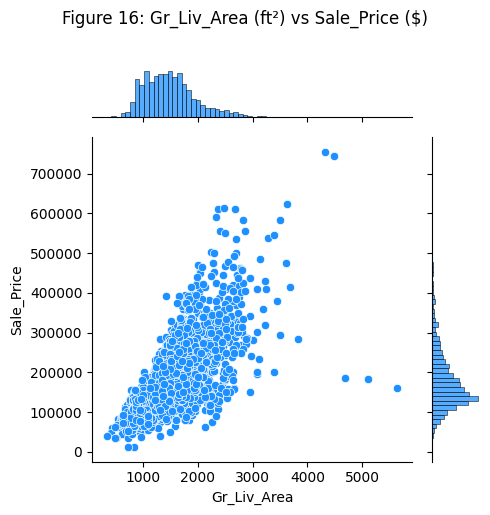

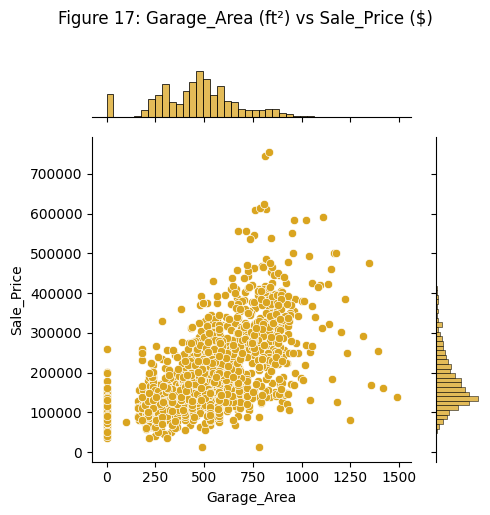

In [11]:
joint = sns.jointplot(
    x='Gr_Liv_Area',
    y='Sale_Price',
    data=df,
    kind='scatter',
    color='dodgerblue',
    height=5
)
joint.figure.suptitle('Figure 16: Gr_Liv_Area (ft²) vs Sale_Price ($)', y=1.02)
plt.tight_layout()
plt.show()

joint = sns.jointplot(
    x='Garage_Area',
    y='Sale_Price',
    data=df,
    kind='scatter',
    color='goldenrod',
    height=5
)
joint.figure.suptitle('Figure 17: Garage_Area (ft²) vs Sale_Price ($)', y=1.02)
plt.tight_layout()
plt.show()

### 7. Linear regression: Sales price, ground living area and garage area - Model 1

#### 7.1 Fit the model

The next code cell below assigns the two key independent variables of ground living area and garage area to X1 and the dependent variable is assigned to y1. A training set (0.75) and test set (0.25) are then created. 

In [12]:
X1 = df[['Gr_Liv_Area', 'Garage_Area']]  
y1 = df['Sale_Price']  

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.25, random_state=42
)

model_1 = LinearRegression()
model_1.fit(X1_train, y1_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 7.2 Generate predictions and evaluate Model 1

The Mean Squared Error (MSE) of 2.6 billion and R-squared results of 0.64 in the output of cell 13 below show that Model 1 performs somewhat poorly and is unable to explain the variance in prices sufficiently. Building a model with just two independent variables is not the best way forward, especially when there is an abundance of other relevant data available (De Cock, 2011). This model does not capture the complexity of what drives property prices, but this can be revised, which will be done in section 8. 

Although a lower MSE means the predictions are, on average, closer to the real values, it should be noted that this very high MSE in the billions is not unusual since house prices in the dataset range from tens of thousands to hundreds of thousands of dollars. The MSE, as a squared value, can be a very large number. 

The MSE is not as useful or interpretable in this case as the Root Mean Squared Error (RMSE). The RMSE quantifies the average size of errors in the measurement unit of the target variable, making it easier to understand how far predictions deviate from the actual data. The RMSE below shows that Model 1 can be off by about USD 51 000, showing there is room for improvement.

In [13]:
y1_predict = model_1.predict(X1_test)

print("Performance metrics for Model 1")

mse_1 = mean_squared_error(y1_test, y1_predict)
r2_1 = r2_score(y1_test, y1_predict)
rmse_1 = np.sqrt(mse_1)

print(f"MSE: {mse_1:,.2f}")
print(f"RMSE: {rmse_1:,.2f}")
print(f"R-squared: {r2_1:.2f}")

Performance metrics for Model 1
MSE: 2,634,371,879.69
RMSE: 51,326.13
R-squared: 0.64


#### 7.3 Error plot

Figure 18 visualises the differences between actual and predicted values (also called residuals) on the y-axis against the predicted values on the x-axis. This helps indicate if the regression model's errors are randomly distributed, which is preferable. If there are patterns in the error plot, this suggests a systematic problem with the model. The plot below shows a somewhat random scatter around the red line, but there is clearly room for improvement. 

In particular, there is considerable increase in the spread of the points at higher prices, suggesting issues with predicting the price of the more expensive houses. This is because the price of expensive homes depends more on their additional features than for simpler, smaller homes. This includes the age of the home, the size of the garden, the number of bathrooms and bedrooms, and if there is a pool. Furthermore, the location of the home is not taken into account. A small home can have a high price if it is in an affluent area, while a large home can have a low price in a less affluent area. 

Some valuable data that we do not have in predicting the property prices is thus the average income by area for each home. When combining this with all the other variables, an accurate model is possible.

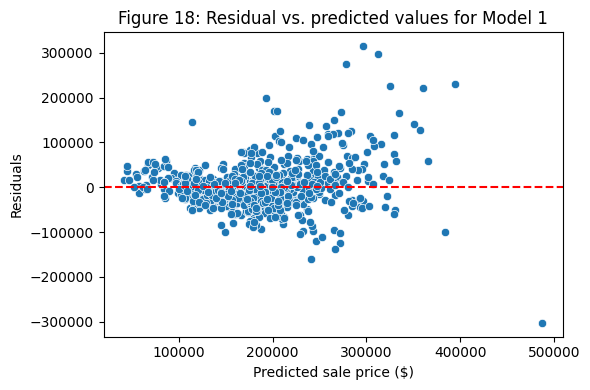

In [14]:
residuals = y1_test - y1_predict

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y1_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted sale price ($)')
plt.ylabel('Residuals')
plt.title('Figure 18: Residual vs. predicted values for Model 1')
plt.tight_layout()
plt.show()

#### 7.4 Interpret Model 1 intercept and coefficients

The intercept is a model parameter showing the predicted value of the dependent variable (property price) when all the independent variables are zero. This is the point on the graph where the line intercepts the y-axis. The negative value (around -5 000) in the output of cell 15 below is a result of the numerical nature of linear regression and its plotting on a Cartesian plane. A 'home' that has no living or garage space can be considered as having no or a negative value in theory when compared to how the data is distributed for homes that do have these features. Beyond this consideration, the intercept parameter does not necessarily have further meaning when placed in context.  

The coefficients, also called slopes, are parameters showing how much the predicted value changes for a one-unit (square foot) increase in an independent variable - while keeping other independent variables constant so that the effect of individual features can be gauged separately. The coefficients in this case are dollar values. The coefficient for ground living area means that, holding garage area constant, each additional square foot of above-ground area inside the home is associated with an increase of about USD 78.69 in the predicted sale price. This gives us some indication of the average value of a square foot of residential property when considered on its own.

The coefficient for garage area means that, holding ground living area constant, each additional square foot is associated with an increase of about USD 141.15 in the predicted sale price. It seems that garage area has a much larger effect on sale price than living area in this dataset. However, this does not mean this is a direct effect. It seems more likely that a larger garage is valued as part of a whole house with a number of attractive features that together command a higher price. It may not be the correct conclusion to draw here that garage area is more valuable because the coefficients are calculated independently of each other and cannot necessarily be compared.

In [15]:
print(f"Intercept: {model_1.intercept_:,.2f}")

coef_rounded_1 = np.round(model_1.coef_, 2)
print(f"Coefficients: {coef_rounded_1}")

Intercept: -5,059.45
Coefficients: [ 78.69 141.15]


### 7.5 Median, quartile and maximum sale price predictions

The predicted median house price by Model 1 is just over USD 176 000, as shown in the output of cell 16. The median is also called quartile 2 (Q2). 

The model is not too far off, with a difference of about 9% from the actual median price of USD 160 000. However, there seem to be other factors that are not being taken into account in the prediction and that might even slightly devalue the real median house price compared to just the living and garage space, which I suggest may well be the property location. 

For Q1, the actual price is USD 129 500, showing a difference that is also relatively small of about 8% compared to the predicted value (140 738). Overall, for Q1 and the median (Q2), the model over-estimates the price and the importance of living and garage space around the 130 000 and 160 000 dollar price points.

Nevertheless, Model 1 performs best when predicting the price of the Q3 home. The actual price is USD 213 500, showing a difference of only around 2 000 dollars or just under 1% from the predicted value (215 728). This suggests that garage and living space are particularly important around the 210 000 dollar price point.

Finally, Model 1 performs most poorly when predicting the maximum house price, so that the predicted price is just over a third lower than the actual price. The actual maximum prices is USD 755 000, but the predicted value is USD 487 681. This backs up the claim that a larger living and garage area are only two features among many of an expensive home that contribute to its higher valuation price.

In [16]:
# Actual median and quartiles

median_gr_liv_area = df['Gr_Liv_Area'].median()
median_garage_area = df['Garage_Area'].median()
median_values_1 = pd.DataFrame(
    [[median_gr_liv_area, median_garage_area]],
    columns=['Gr_Liv_Area', 'Garage_Area']
)

actual_q1 = df['Sale_Price'].quantile(0.25)
actual_median = df['Sale_Price'].median()
actual_q3 = df['Sale_Price'].quantile(0.75)
actual_max = df['Sale_Price'].max()

# Model 1 predicted values 

pred_q1_1 = pd.Series(y1_predict).quantile(0.25)
pred_median_1 = model_1.predict(median_values_1)[0]
pred_q3_1 = pd.Series(y1_predict).quantile(0.75)
max_pred_1 = pd.Series(y1_predict).max()

print("Prediction comparison for Model 1")
print(f"Q1 - Actual: {actual_q1:,.0f}, Predicted: {pred_q1_1:,.0f}")
print(f"Q2/Median - Actual: {actual_median:,.0f}, Predicted: {pred_median_1:,.0f}")
print(f"Q3 - Actual: {actual_q3:,.0f}, Predicted: {pred_q3_1:,.0f}")
print(f"Max - Actual: {actual_max:,.0f}, Predicted: {max_pred_1:,.0f}")

Prediction comparison for Model 1
Q1 - Actual: 129,500, Predicted: 140,738
Q2/Median - Actual: 160,000, Predicted: 176,166
Q3 - Actual: 213,500, Predicted: 215,728
Max - Actual: 755,000, Predicted: 487,681


### 8. Rerun linear regression including all independent variables - Model 2

Below, the linear regression process is run again and some key indicators of the revised model's success are displayed. The data is scaled this time because the units for the variables differ. The MSE is now lower at 1.47 billion and the RMSE is also lower at about USD 38 000. These values, along with the increased R-squared result of 0.80, show that Model 2 performs and explains variance in prices better overall than Model 1. 

The RMSE has improved by about USD 13 000, which is encouraging. The difference between the actual and predicted Q1, median and maximum prices has thus decreased so that these predictions are much more accurate.

Only the Q3 prediction is less accurate than before (about 1% compared to 6%). This shows the importance of living and garage space for houses around the USD 210 000 price point. Other factors can thus slightly mask how important the actual size of the home is for buyers in this price range. For larger, middle-income families who can afford this price range, the actual living and garage space may be very important compared to other factors, such as the age of the home and when it was last renovated. 

In [17]:
X2 = df.drop(columns=['Sale_Price'])
y2 = df['Sale_Price']

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_scaled, y2, test_size=0.25, random_state=42
)

model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)

y2_predict = model_2.predict(X2_test)

mse_2 = mean_squared_error(y2_test, y2_predict)
r2_2 = r2_score(y2_test, y2_predict)
rmse_2 = np.sqrt(mse_2)

print("Performance metrics for Model 2")
print(f"Mean Squared Error: {mse_2:,.2f}")
print(f"RMSE: {rmse_2:,.2f}")
print(f"R-squared: {r2_2:.2f}")

# Actual house price median and quartiles are the same as in 7.5

# All independent variables
independent_vars_2 = [
    'Year_Built', 'Year_Remod_Add', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF',
    'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
    'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area'
]

# Calculate the median for each independent variable
median_values_2 = df[independent_vars_2].median()

# Convert to DataFrame row 
median_values_2_df = median_values_2.to_frame().T
median_values_2_df.columns = independent_vars_2

# Scale the median values using the same scaler as the model
median_values_2_scaled = scaler.transform(median_values_2_df)

# Model 2 predicted house prices

pred_q1_2 = pd.Series(y2_predict).quantile(0.25)
pred_median_2 = model_2.predict(median_values_2_scaled)[0]
pred_q3_2 = pd.Series(y2_predict).quantile(0.75)
max_pred_2 = pd.Series(y2_predict).max()

print("\nPrediction comparison for Model 2")
print(f"Q1 - Actual: {actual_q1:,.0f}, Predicted: {pred_q1_2:,.0f}")
print(f"Q2/Median - Actual: {actual_median:,.0f}, Predicted: {pred_median_2:,.0f}")
print(f"Q3 - Actual: {actual_q3:,.0f}, Predicted: {pred_q3_2:,.0f}")
print(f"Max - Actual: {actual_max:,.0f}, Predicted: {max_pred_2:,.0f}")

Performance metrics for Model 2
Mean Squared Error: 1,471,657,842.89
RMSE: 38,362.19
R-squared: 0.80

Prediction comparison for Model 2
Q1 - Actual: 129,500, Predicted: 130,291
Q2/Median - Actual: 160,000, Predicted: 162,757
Q3 - Actual: 213,500, Predicted: 228,302
Max - Actual: 755,000, Predicted: 542,808


### 9. Summary of findings

The first main finding is that Model 2 with more independent variables included performs better than Model 1 based on living and garage space alone, with an R-squared value of 0.64 for Model 1 compared to 0.80 for Model 2. However, living and garage space are still highly relevant in some cases as Model 1 can account for almost the full value of certain homes around Q3. Nevertheless, the Q1, median and maximum prices are much better predicted by Model 2.

A second main finding is that location and income by area are key factors not being taken into account in the dataset. Including more data improves the model, but the model will likely perform even better when property location and income level are taken into account. The full Ames housing dataset contains many more variables than those in the dataset used for modelling here, although income level by area is not available (De Cock, 2011; scikit-learn, 2024c). 

Other studies using the full dataset have found that neighbourhood and quality or state of the home are as strong predictors of price as the size of the home (Dornel, n.d.; Kuhn & Silge, 2023). The full dataset includes many features that can also affect the price for more expensive homes, such as porch and pool area, cooling and heating systems, and quality of the interior and exterior. Including these factors can allow the model to predict the prices of more expensive homes better. 

Interestingly, the full dataset also includes the year of sale, which is between 2006 and 2010. This is a key factor that can influence the final selling price of a home based on the economic conditions at the time, especially because the data falls within the so-called "Great Recession" period of 2007 to 2009 in the US (Federal Reserve History, 2013). 

#### References

Bedson, P. & Duguid Farrant, T. (2009). *Practical Statistics for the Analytical Scientist: A Bench Guide*. Royal Society of Chemistry.

Bernau, A. (2025). Standard Garage Size: 1-, 2-, 3-, 4-Car Garage Dimensions + Diagrams. Alan's Factory Outlet. https://alansfactoryoutlet.com/blog/standard-garage-size/?srsltid=AfmBOorn6ij_68MSPTfXhSZf_vL1Z9PK0gi5fUMNp7TWa892_ypyyQLx

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. *Journal of Statistics Education*, 19(3): 1-15.

Dornel, B. (n.d.). Project 2: Predicting Housing Prices with Linear Regression. https://www.benjamindornel.com/ames-regression.html

Federal Reserve History. (2013). The Great Recession and Its Aftermath. https://www.federalreservehistory.org/essays/great-recession-and-its-aftermath

Geeks for Geeks. (2024). Step-by-Step Guide to Calculating RMSE Using Scikit-learn. https://www.geeksforgeeks.org/machine-learning/step-by-step-guide-to-calculating-rmse-using-scikit-learn

Kuhn, M. & Silge, J. (2023). 4 The Ames Housing Data. *Tidy Modeling with R*. https://www.tmwr.org/ames

HyperionDev. (2025a). Data Cleaning and Preprocessing. Course materials. Private repository, GitHub.

HyperionDev. (2025b). Data Visualisation – Approach and Techniques. Course materials. Private repository, GitHub.

HyperionDev. (2025c). Exploratory Data Analysis. Course materials. Private repository, GitHub.

HyperionDev. (2025d). Supervised Learning – Linear Regression. Course materials. Private repository, GitHub.

HyperionDev. (2025e). Machine Learning. Course materials. Private repository, GitHub.

Lua Software. (2020). Matplotlib Plot All Images with Dynamic Row (Grid). https://code.luasoftware.com/tutorials/matplotlib/matplotlib-show-top-title

May, M. (2023). Tackling the Ames Housing Dataset. Medium. https://medium.com/@mskmay66/tackling-the-ames-housing-dataset-c63e7947908a

Safjan, K. (2022). Pro Tips for Diagnosing Regression Model Errors. https://safjan.com/regression-model-errors-plot

scikit-learn. (2024a). LinearRegression. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

scikit-learn. (2024b). sklearn.metrics. https://scikit-learn.org/stable/api/sklearn.metrics.html

scikit-learn. (2024c). The Ames housing dataset. https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html

scikit-learn. (2024d). train_test_split. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Seaborn. (2025a). Building structured multi-plot grids. https://seaborn.pydata.org/tutorial/axis_grids.html

Seaborn. (2025b). seaborn.jointplot. https://seaborn.pydata.org/generated/seaborn.jointplot.html

Seaborn. (2025c). seaborn.kdeplot. https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Seaborn. (2025d). Visualizing statistical relationships. https://seaborn.pydata.org/tutorial/relational.html

Siegel, A. (2012). *Practical Business Statistics*. Academic Press.

Solomon, B. (n.d.). Python Plotting With Matplotlib (Guide). https://realpython.com/python-matplotlib-guide

StackOverflow. (2020). Pandas drop duplicates keep first and last, is it possible? https://stackoverflow.com/questions/62721639pandas-drop-duplicates-keep-first-and-last-is-it-possible

Story of Mathematics, The. (n.d.). The Quartiles – Explanation & Examples. https://www.storyofmathematics.com/quartile

pandas. (2025). pandas.DataFrame.drop_duplicates. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

Pennsylvania State University. (2018). 10.10 - Other Regression Pitfalls. https://online.stat.psu.edu/stat462/node/185

PyPI. (2025). python-math 0.0.1. https://pypi.org/project/python-math